In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
nyc_stations = pd.read_csv('Data/NYC Data/MTA_Subway_Stations_20250124.csv')

In [3]:
nyc_stations.head()

,GTFS Stop ID,Station ID,Complex ID,Division,Line,Stop Name,Borough,CBD,Daytime Routes,Structure,GTFS Latitude,GTFS Longitude,North Direction Label,South Direction Label,ADA,ADA Northbound,ADA Southbound,ADA Notes,Georeference
0,R01,1,1,BMT,Astoria,Astoria-Ditmars Blvd,Q,False,N W,Elevated,40.775036,-73.912034,Last Stop,Manhattan,0,0,0,NaN,POINT (-73.912034 40.775036)
1,R03,2,2,BMT,Astoria,Astoria Blvd,Q,False,N W,Elevated,40.770258,-73.917843,Astoria,Manhattan,1,1,1,NaN,POINT (-73.917843 40.770258)
2,R04,3,3,BMT,Astoria,30 Av,Q,False,N W,Elevated,40.766779,-73.921479,Astoria,Manhattan,0,0,0,NaN,POINT (-73.921479 40.766779)
3,R05,4,4,BMT,Astoria,Broadway,Q,False,N W,Elevated,40.761820,-73.925508,Astoria,Manhattan,0,0,0,NaN,POINT (-73.925508 40.76182)
4,R06,5,5,BMT,Astoria,36 Av,Q,False,N W,Elevated,40.756804,-73.929575,Astoria,Manhattan,0,0,0,NaN,POINT (-73.929575 40.756804)


In [4]:
line_list = nyc_stations['Line'].unique()
line_list.sort()
station_list = nyc_stations['Stop Name'].unique()
station_list.sort()

G = nx.Graph()

In [5]:
pd.array(nyc_stations[nyc_stations['Stop Name'] == '14 St']['Line'])

<NumpyExtensionArray>
['8th Av - Fulton St', '6th Av - Culver', 'Broadway - 7Av']
Length: 3, dtype: object

In [6]:
transfer_df = {}

for station in station_list:
    if len(pd.array(nyc_stations[nyc_stations['Stop Name'] == station]['Line'])) > 1:
        transfer_df[station] = []
        transfer_df[station] = pd.array(nyc_stations[nyc_stations['Stop Name'] == station]['Line'])

In [7]:
transfer_df

{'103 St': <NumpyExtensionArray>
 ['8th Av - Fulton St', 'Broadway - 7Av', 'Lexington Av']
 Length: 3, dtype: object,
 '104 St': <NumpyExtensionArray>
 ['Jamaica', 'Liberty Av']
 Length: 2, dtype: object,
 '111 St': <NumpyExtensionArray>
 ['Jamaica', 'Liberty Av', 'Flushing']
 Length: 3, dtype: object,
 '116 St': <NumpyExtensionArray>
 ['8th Av - Fulton St', 'Lexington Av', 'Lenox - White Plains Rd']
 Length: 3, dtype: object,
 '125 St': <NumpyExtensionArray>
 [     '8th Av - Fulton St',          'Broadway - 7Av',
             'Lexington Av', 'Lenox - White Plains Rd']
 Length: 4, dtype: object,
 '135 St': <NumpyExtensionArray>
 ['8th Av - Fulton St', 'Lenox - White Plains Rd']
 Length: 2, dtype: object,
 '14 St': <NumpyExtensionArray>
 ['8th Av - Fulton St', '6th Av - Culver', 'Broadway - 7Av']
 Length: 3, dtype: object,
 '14 St-Union Sq': <NumpyExtensionArray>
 ['Broadway - Brighton', 'Canarsie', 'Lexington Av']
 Length: 3, dtype: object,
 '145 St': <NumpyExtensionArray>
 ['8th Av - 

In [8]:
G.add_nodes_from(line_list)

In [9]:
G.nodes()

NodeView(('4th Av', '63rd St', '6th Av - Culver', '8th Av - Fulton St', 'Astoria', 'Broadway', 'Broadway - 7Av', 'Broadway - Brighton', 'Canarsie', 'Clark St', 'Concourse', 'Crosstown', 'Dyre Av', 'Eastern Pky', 'Flushing', 'Franklin Shuttle', 'Jamaica', 'Jerome Av', 'Lenox - White Plains Rd', 'Lexington - Shuttle', 'Lexington Av', 'Liberty Av', 'Manhattan Bridge', 'Myrtle Av', 'Nostrand', 'Pelham', 'Queens - Archer', 'Queens Blvd', 'Rockaway', 'Sea Beach', 'Sea Beach / West End / Culver / Brighton', 'Second Av', 'Staten Island', 'West End'))

In [ ]:
edges = []

for transfer in transfer_df:
    lines = transfer_df[transfer]
    print(transfer)
    for i in range(len(lines)):
        for j in range(i):
            if i != j:
                edge = (lines[i], lines[j])
                if G.has_edge(*edge):

                    print(f'increased weight of {lines[i]} to {lines[j]}')
                else:
                    G.add_edge(edge)
                    print(f'added edge {lines[i]} to {lines[j]}')
    print()

103 St


KeyError: 'weight'

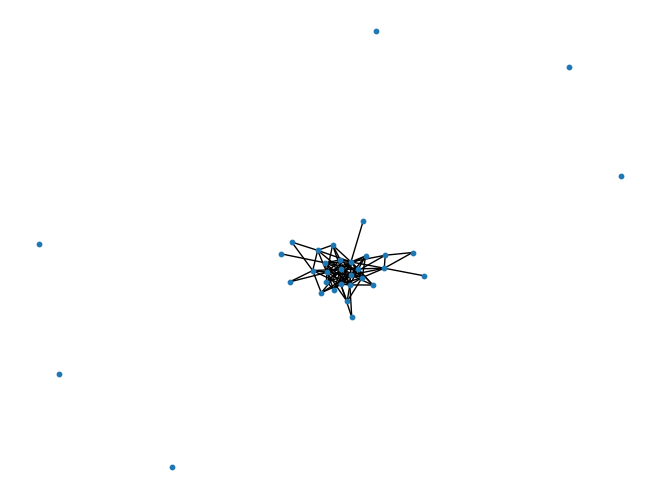

In [11]:
nx.draw(G, with_labels=False, node_size=10)
plt.show()


In [12]:
G.edges('Broadway')

EdgeDataView([('Broadway', 'Manhattan Bridge'), ('Broadway', 'Jamaica'), ('Broadway', '8th Av - Fulton St'), ('Broadway', 'Broadway - 7Av'), ('Broadway', 'Lexington Av')])

In [13]:
adj_net = pd.DataFrame(nx.adjacency_matrix(G))
adj_net.columns = list(G.nodes)
adj_net.index = list(G.nodes)

In [14]:
adj_net

,4th Av,63rd St,6th Av - Culver,8th Av - Fulton St,Astoria,Broadway,Broadway - 7Av,Broadway - Brighton,Canarsie,Clark St,...,Nostrand,Pelham,Queens - Archer,Queens Blvd,Rockaway,Sea Beach,Sea Beach / West End / Culver / Brighton,Second Av,Staten Island,West End
4th Av,0,0,1,1,0,0,1,1,0,0,...,0,0,0,1,0,1,0,1,0,0
63rd St,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6th Av - Culver,1,0,0,1,0,0,1,1,1,0,...,1,0,0,1,0,1,0,0,0,1
8th Av - Fulton St,1,0,1,0,0,1,1,1,1,1,...,0,0,0,0,0,1,0,1,0,1
Astoria,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Broadway,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Broadway - 7Av,1,0,1,1,0,1,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1
Broadway - Brighton,1,0,1,1,0,0,1,0,1,0,...,1,0,0,1,0,1,0,0,0,0
Canarsie,0,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
Clark St,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
adj_net.to_csv('Data/Master Sets/NYC Master/NYC_Subway_Adjacency_Matrix_by_Line.csv')